<a href="https://colab.research.google.com/github/omarfathyz8/GTC-Ecommerce-Recommendation-Engine/blob/main/EDA_Cleaning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
arhamrumi_amazon_product_reviews_path = kagglehub.dataset_download('arhamrumi/amazon-product-reviews')

print('Data source import complete.')


Using Colab cache for faster access to the 'amazon-product-reviews' dataset.
Data source import complete.


In [ ]:
df = pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')

In [ ]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict

class ProductNameGenerator:
    def __init__(self):
        # Define product categories with realistic distributions
        self.categories = {
            'Electronics': {
                'weight': 0.25,
                'subcategories': {
                    'Smartphones': {
                        'Samsung': ['Galaxy S23', 'Galaxy S22', 'Galaxy Note 20', 'Galaxy A54', 'Galaxy Z Fold', 'Galaxy Z Flip'],
                        'Apple': ['iPhone 14', 'iPhone 13', 'iPhone 12', 'iPhone SE', 'iPhone 14 Pro', 'iPhone 13 Mini'],
                        'OnePlus': ['11 Pro', '10T', '9 Pro', 'Nord CE', 'Nord 2T', 'Ace Pro'],
                        'Google': ['Pixel 7', 'Pixel 6a', 'Pixel 7 Pro', 'Pixel 6 Pro', 'Pixel 5a', 'Pixel 4a'],
                        'Xiaomi': ['Mi 13', 'Mi 12', 'Redmi Note 12', 'Poco X5', 'Mi 11T', 'Redmi K60'],
                        'Huawei': ['P50 Pro', 'Mate 50', 'Nova 10', 'P40 Lite', 'Honor Magic', 'Y9a']
                    },
                    'Laptops': {
                        'Dell': ['XPS 13', 'XPS 15', 'Inspiron 15', 'Latitude 14', 'Alienware m15', 'Vostro 14'],
                        'HP': ['Pavilion 15', 'Envy x360', 'EliteBook 14', 'Omen 16', 'ProBook 15', 'Spectre x360'],
                        'Lenovo': ['ThinkPad X1', 'IdeaPad 5', 'Yoga 7i', 'Legion 5', 'ThinkBook 14', 'Flex 5'],
                        'Apple': ['MacBook Air', 'MacBook Pro 13', 'MacBook Pro 14', 'MacBook Pro 16', 'iMac 24', 'Mac Studio'],
                        'ASUS': ['ZenBook 14', 'VivoBook 15', 'ROG Strix', 'TUF Gaming', 'ProArt 15', 'ExpertBook'],
                        'Acer': ['Aspire 5', 'Swift 3', 'Predator Helios', 'Nitro 5', 'ConceptD 7', 'TravelMate']
                    },
                    'Headphones': {
                        'Sony': ['WH-1000XM4', 'WH-1000XM5', 'WF-1000XM4', 'WH-CH720N', 'MDR-7506', 'LinkBuds'],
                        'Bose': ['QuietComfort 45', 'QuietComfort Earbuds', '700 Headphones', 'SoundLink Mini', 'Sport Earbuds', 'Frames'],
                        'Apple': ['AirPods Pro', 'AirPods 3rd Gen', 'AirPods Max', 'AirPods 2nd Gen', 'Beats Studio3', 'Beats Fit Pro'],
                        'Sennheiser': ['HD 660S', 'Momentum 4', 'HD 650', 'PXC 550', 'IE 300', 'HD 800S'],
                        'JBL': ['Live 650', 'Tune 760NC', 'Reflect Flow', 'Club Pro+', 'Quantum 800', 'Flip 6'],
                        'Audio-Technica': ['ATH-M50x', 'ATH-WS1100iS', 'ATH-CKS5TW', 'ATH-MSR7b', 'ATH-AD700X', 'ATH-M40x']
                    }
                }
            },
            'Beauty': {
                'weight': 0.15,
                'subcategories': {
                    'Skincare': {
                        'brands': ['CeraVe', 'The Ordinary', 'Neutrogena', 'Olay', 'Clinique', 'L\'Oreal'],
                        'models': ['Moisturizer', 'Cleanser', 'Serum', 'Sunscreen', 'Eye Cream', 'Toner'],
                        'specs': ['Hydrating', 'Anti-Aging', 'Sensitive Skin', 'Daily', 'Night', 'SPF 30']
                    },
                    'Makeup': {
                        'brands': ['Maybelline', 'MAC', 'Urban Decay', 'Fenty Beauty', 'NARS', 'Charlotte Tilbury'],
                        'models': ['Foundation', 'Lipstick', 'Mascara', 'Eyeshadow', 'Concealer', 'Blush'],
                        'specs': ['Matte', 'Long-wearing', 'Waterproof', 'Natural', 'Bold', 'Nude']
                    }
                }
            },
            'Books': {
                'weight': 0.15,
                'subcategories': {
                    'Fiction': {
                        'brands': ['Penguin', 'HarperCollins', 'Random House', 'Simon & Schuster', 'Macmillan'],
                        'models': ['Novel', 'Mystery', 'Romance', 'Thriller', 'Fantasy', 'Sci-Fi'],
                        'specs': ['Bestseller', 'Award Winner', 'New Release', 'Classic', 'Series', 'Paperback']
                    },
                    'Non-Fiction': {
                        'brands': ['Harvard Business', 'MIT Press', 'Oxford', 'Cambridge', 'McGraw Hill'],
                        'models': ['Guide', 'Handbook', 'Manual', 'Encyclopedia', 'Biography', 'History'],
                        'specs': ['Complete', 'Essential', 'Comprehensive', 'Updated Edition', 'Professional', 'Beginner']
                    }
                }
            },
            'Home_Kitchen': {
                'weight': 0.20,
                'subcategories': {
                    'Kitchen_Appliances': {
                        'brands': ['Instant Pot', 'Ninja', 'KitchenAid', 'Cuisinart', 'Hamilton Beach', 'Breville'],
                        'models': ['Pressure Cooker', 'Air Fryer', 'Blender', 'Coffee Maker', 'Stand Mixer', 'Food Processor'],
                        'specs': ['8-Qt', '6-Qt', 'Stainless Steel', 'Digital', 'Multi-Function', 'Compact']
                    },
                    'Home_Decor': {
                        'brands': ['IKEA', 'West Elm', 'CB2', 'Target', 'HomeGoods', 'Wayfair'],
                        'models': ['Lamp', 'Pillow', 'Rug', 'Wall Art', 'Vase', 'Candle'],
                        'specs': ['Modern', 'Vintage', 'Minimalist', 'Boho', 'Industrial', 'Scandinavian']
                    }
                }
            },
            'Clothing': {
                'weight': 0.15,
                'subcategories': {
                    'Womens_Fashion': {
                        'brands': ['Zara', 'H&M', 'Nike', 'Adidas', 'Levi\'s', 'Gap'],
                        'models': ['Dress', 'Jeans', 'T-Shirt', 'Sweater', 'Shoes', 'Jacket'],
                        'specs': ['Casual', 'Formal', 'Comfortable', 'Trendy', 'Classic', 'Plus Size']
                    },
                    'Mens_Fashion': {
                        'brands': ['Nike', 'Adidas', 'Levi\'s', 'Under Armour', 'Ralph Lauren', 'Tommy Hilfiger'],
                        'models': ['Sneakers', 'Jeans', 'Polo Shirt', 'Hoodie', 'Jacket', 'Shorts'],
                        'specs': ['Athletic', 'Casual', 'Slim Fit', 'Regular Fit', 'Comfortable', 'Breathable']
                    }
                }
            },
            'Sports_Outdoors': {
                'weight': 0.10,
                'subcategories': {
                    'Fitness': {
                        'brands': ['Nike', 'Adidas', 'Under Armour', 'Reebok', 'New Balance', 'PUMA'],
                        'models': ['Running Shoes', 'Yoga Mat', 'Dumbbells', 'Resistance Bands', 'Water Bottle', 'Fitness Tracker'],
                        'specs': ['Lightweight', 'Non-slip', 'Adjustable', 'Wireless', 'Waterproof', 'Ergonomic']
                    }
                }
            }
        }

    def generate_product_name(self, category, subcategory):
        """Generate a realistic product name with correct brand-model matching"""
        cat_data = self.categories[category]['subcategories'][subcategory]

        # Pick a random brand first
        brand = random.choice(list(cat_data.keys()))

        # Then pick a model that actually belongs to that brand
        model = random.choice(cat_data[brand])

        # Add realistic specs/variants
        specs = {
            'Smartphones': ['128GB', '256GB', '512GB', 'Pro', 'Ultra', 'Plus', '5G'],
            'Laptops': ['15-inch', '13-inch', '17-inch', '16GB RAM', '512GB SSD', 'i7'],
            'Headphones': ['Wireless', 'Noise Cancelling', 'Pro', 'Over-Ear', 'In-Ear', 'Bluetooth'],
            'Skincare': ['50ml', '100ml', 'Daily', 'Night', 'Sensitive Skin', 'Anti-Aging'],
            'Makeup': ['Matte', 'Long-wearing', 'Waterproof', 'Natural', 'Bold', 'Nude'],
            'Kitchen_Appliances': ['8-Qt', '6-Qt', 'Stainless Steel', 'Digital', 'Multi-Function'],
            'Fitness': ['Lightweight', 'Non-slip', 'Adjustable', 'Wireless', 'Waterproof']
        }

        # Get appropriate specs for the subcategory
        spec_options = specs.get(subcategory, ['Standard', 'Premium', 'Pro', 'Deluxe'])
        spec = random.choice(spec_options)

        # Different naming patterns for variety
        patterns = [
            f"{brand} {model} {spec}",
            f"{brand} {model}",
            f"{brand} {model} - {spec}",
            f"{brand} {spec} {model}"
        ]

        return random.choice(patterns)

    def assign_categories_to_products(self, product_ids, ratings_df=None):
        """Assign categories to product IDs based on patterns"""
        np.random.seed(42)  # For reproducible results

        # Convert product_ids to list if it's not already
        if hasattr(product_ids, 'tolist'):
            product_ids = product_ids.tolist()
        elif not isinstance(product_ids, list):
            product_ids = list(product_ids)

        # Calculate category distribution
        total_products = len(product_ids)
        category_counts = {}

        for category, data in self.categories.items():
            count = int(total_products * data['weight'])
            category_counts[category] = count

        # Assign categories
        category_assignments = []

        for category, count in category_counts.items():
            category_assignments.extend([category] * count)

        # Fill remaining with random categories
        remaining = total_products - len(category_assignments)
        if remaining > 0:
            extra_categories = np.random.choice(list(self.categories.keys()), remaining)
            category_assignments.extend(extra_categories.tolist())

        # Shuffle assignments
        np.random.shuffle(category_assignments)

        return dict(zip(product_ids, category_assignments))

    def generate_product_catalog(self, product_ids, ratings_df=None):
        """Generate complete product catalog"""
        print(f"Generating product names for {len(product_ids)} products...")

        # Convert to list if needed
        if hasattr(product_ids, 'tolist'):
            product_ids = product_ids.tolist()
        elif not isinstance(product_ids, list):
            product_ids = list(product_ids)

        # Assign categories
        category_assignments = self.assign_categories_to_products(product_ids, ratings_df)

        # Generate product data
        products = []

        for product_id in product_ids:
            try:
                category = category_assignments[product_id]
                subcategories = list(self.categories[category]['subcategories'].keys())
                subcategory = random.choice(subcategories)

                product_name = self.generate_product_name(category, subcategory)

                products.append({
                    'product_id': product_id,
                    'product_name': product_name,
                    'main_category': category,
                    'subcategory': subcategory,
                    'category': f"{category} > {subcategory}"
                })
            except KeyError as e:
                print(f"Warning: Could not process product_id {product_id}: {e}")
                continue

        return pd.DataFrame(products)

# Main function for Amazon review dataset
def create_enhanced_amazon_dataset(reviews_file_path):
    """
    Create enhanced Amazon dataset with realistic product names

    Parameters:
    - reviews_file_path: path to your Amazon reviews CSV file with columns:
      ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
    """
    import os

    generator = ProductNameGenerator()

    print("Loading Amazon reviews dataset...")
    try:
        # Convert file path to string if it's not already
        if hasattr(reviews_file_path, '__str__'):
            file_path = str(reviews_file_path)
        else:
            file_path = reviews_file_path

        # Check if file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")

        print(f"Reading file: {file_path}")

        # Try different approaches for reading CSV
        try:
            # Method 1: Standard read_csv
            reviews_df = pd.read_csv(file_path, encoding='utf-8')
        except Exception as e1:
            print(f"Standard read failed: {e1}")
            try:
                # Method 2: With explicit engine
                reviews_df = pd.read_csv(file_path, engine='python', encoding='utf-8')
            except Exception as e2:
                print(f"Python engine failed: {e2}")
                try:
                    # Method 3: With different encoding
                    reviews_df = pd.read_csv(file_path, encoding='latin-1')
                except Exception as e3:
                    print(f"Latin-1 encoding failed: {e3}")
                    raise Exception("All CSV reading methods failed")

        print(f"✅ Successfully loaded {len(reviews_df):,} reviews")

        # Check required columns
        required_columns = ['ProductId', 'UserId', 'Score']
        missing_columns = [col for col in required_columns if col not in reviews_df.columns]

        if missing_columns:
            print(f"⚠️  Missing columns: {missing_columns}")
            print(f"Available columns: {list(reviews_df.columns)}")
            return None, None

        print(f"Unique products: {reviews_df['ProductId'].nunique():,}")
        print(f"Unique users: {reviews_df['UserId'].nunique():,}")

        # Get unique products
        unique_products = reviews_df['ProductId'].unique()
        print(f"Processing {len(unique_products)} unique products...")

        # Generate product catalog with realistic names
        print("\nGenerating realistic product names...")
        product_catalog = generator.generate_product_catalog(unique_products, reviews_df)

        if product_catalog is None or len(product_catalog) == 0:
            print("❌ Failed to generate product catalog")
            return None, None

        # Merge with original reviews data
        print("Merging product names with reviews...")
        enhanced_df = reviews_df.merge(product_catalog, left_on='ProductId', right_on='product_id', how='left')

        # Clean up columns
        enhanced_df = enhanced_df.drop('product_id', axis=1)

        # Reorder columns for better readability (only include existing columns)
        base_columns = ['Id', 'ProductId', 'product_name', 'main_category', 'subcategory', 'category']
        remaining_columns = [col for col in reviews_df.columns if col not in ['ProductId']]

        column_order = []
        for col in base_columns + remaining_columns:
            if col in enhanced_df.columns:
                column_order.append(col)

        enhanced_df = enhanced_df[column_order]

        print("\nEnhanced Dataset Preview:")
        preview_cols = [col for col in ['ProductId', 'product_name', 'main_category', 'UserId', 'Score']
                       if col in enhanced_df.columns]
        print(enhanced_df[preview_cols].head(10))

        print(f"\nDataset Summary:")
        print(f"Total reviews: {len(enhanced_df):,}")
        print(f"Products with names: {enhanced_df['product_name'].notna().sum():,}")
        if 'Score' in enhanced_df.columns:
            print(f"Average score: {enhanced_df['Score'].mean():.2f}")

        print(f"\nCategory Distribution:")
        print(enhanced_df['main_category'].value_counts())

        return enhanced_df, product_catalog

    except Exception as e:
        print(f"❌ Error processing dataset: {str(e)}")
        print(f"Error type: {type(e).__name__}")
        import traceback
        traceback.print_exc()
        return None, None

def analyze_dataset_for_recommendations(enhanced_df):
    """
    Analyze the enhanced dataset for recommendation system suitability
    """
    print("\n" + "="*50)
    print("RECOMMENDATION SYSTEM ANALYSIS")
    print("="*50)

    # Basic stats
    n_users = enhanced_df['UserId'].nunique()
    n_products = enhanced_df['ProductId'].nunique()
    n_interactions = len(enhanced_df)

    print(f"Users: {n_users:,}")
    print(f"Products: {n_products:,}")
    print(f"Interactions: {n_interactions:,}")

    # Sparsity calculation
    sparsity = 1 - (n_interactions / (n_users * n_products))
    print(f"Matrix sparsity: {sparsity:.4f} ({sparsity*100:.2f}% sparse)")

    # User activity
    user_activity = enhanced_df.groupby('UserId').size()
    print(f"\nUser Activity:")
    print(f"Average reviews per user: {user_activity.mean():.1f}")
    print(f"Median reviews per user: {user_activity.median():.1f}")
    print(f"Users with 5+ reviews: {(user_activity >= 5).sum():,}")
    print(f"Users with 10+ reviews: {(user_activity >= 10).sum():,}")

    # Product popularity
    product_popularity = enhanced_df.groupby('ProductId').size()
    print(f"\nProduct Popularity:")
    print(f"Average reviews per product: {product_popularity.mean():.1f}")
    print(f"Products with 5+ reviews: {(product_popularity >= 5).sum():,}")
    print(f"Products with 10+ reviews: {(product_popularity >= 10).sum():,}")

    # Recommendation feasibility
    print(f"\n{'COLLABORATIVE FILTERING FEASIBILITY:'}")
    if n_users >= 1000 and user_activity.mean() >= 3:
        print("✅ EXCELLENT - Great for collaborative filtering!")
    elif n_users >= 500 and user_activity.mean() >= 2:
        print("✅ GOOD - Suitable for collaborative filtering")
    elif n_users >= 100:
        print("⚠️  MODERATE - May work with Matrix Factorization")
    else:
        print("❌ CHALLENGING - Consider content-based filtering")

    print(f"\n{'RECOMMENDED APPROACHES:'}")
    print("1. 🎯 Matrix Factorization (SVD) - Best for this data structure")
    print("2. 🔍 Content-Based Filtering - Using categories and product names")
    print("3. 🚀 Hybrid Model - Combining both approaches")

    return {
        'n_users': n_users,
        'n_products': n_products,
        'n_interactions': n_interactions,
        'sparsity': sparsity,
        'avg_user_activity': user_activity.mean(),
        'avg_product_popularity': product_popularity.mean()
    }

# Complete workflow function
def process_amazon_dataset_complete(reviews_file_path, output_file_path=None):
    """
    Complete workflow: Load data, add product names, analyze, and save as ONE dataset

    Parameters:
    - reviews_file_path: path to your Amazon reviews CSV
    - output_file_path: where to save the final enhanced dataset (optional)

    Returns:
    - enhanced_df: Complete dataset with all original data + product names + categories
    """
    print("🚀 STARTING COMPLETE AMAZON DATASET PROCESSING")
    print("=" * 60)

    # Step 1: Create enhanced dataset
    enhanced_df, product_catalog = create_enhanced_amazon_dataset(reviews_file_path)

    if enhanced_df is None:
        print("❌ Failed to process dataset")
        return None

    # Step 2: Analyze for recommendation systems
    print("\n📊 ANALYZING FOR RECOMMENDATION SYSTEMS")
    print("-" * 40)
    stats = analyze_dataset_for_recommendations(enhanced_df)

    # Step 3: Save the complete dataset
    if output_file_path is None:
        output_file_path = 'complete_amazon_dataset.csv'

    print(f"\n💾 SAVING COMPLETE DATASET")
    print("-" * 40)
    enhanced_df.to_csv(output_file_path, index=False)
    print(f"✅ Saved complete dataset to: {output_file_path}")
    print(f"   - Total rows: {len(enhanced_df):,}")
    print(f"   - Total columns: {len(enhanced_df.columns)}")
    print(f"   - File size: ~{len(enhanced_df) * len(enhanced_df.columns) * 10 / 1024 / 1024:.1f} MB (estimated)")

    # Step 4: Show final summary
    print(f"\n📋 FINAL DATASET SUMMARY")
    print("-" * 40)
    print("Columns in your complete dataset:")
    for i, col in enumerate(enhanced_df.columns, 1):
        print(f"   {i:2d}. {col}")

    print(f"\nSample of your enhanced data:")
    display_cols = ['ProductId', 'product_name', 'main_category', 'UserId', 'Score']
    available_cols = [col for col in display_cols if col in enhanced_df.columns]
    print(enhanced_df[available_cols].head())

    print(f"\n🎯 RECOMMENDATION SYSTEM READY!")
    print("Your dataset now contains:")
    print("✅ Original review data (Id, UserId, ProductId, Score, etc.)")
    print("✅ Generated product names (product_name)")
    print("✅ Product categories (main_category, subcategory, category)")
    print("✅ Perfect for collaborative + content-based filtering!")

    return enhanced_df

# Usage examples
if __name__ == "__main__":
    # Example 1: Process your actual dataset
    print("EXAMPLE 1: Process Your Amazon Reviews Dataset")
    print("-" * 50)

    # Replace with your actual file path
    reviews_file = "/kaggle/input/amazon-product-reviews/Reviews.csv"  # Your 500K+ reviews file

    try:
        # Process everything in one go - returns ONE complete dataset
        complete_dataset = process_amazon_dataset_complete(
            reviews_file_path=reviews_file,
            output_file_path='my_complete_amazon_dataset.csv'
        )

        if complete_dataset is not None:
            print(f"\n🎉 SUCCESS! Your complete dataset is ready!")
            print(f"File: 'my_complete_amazon_dataset.csv'")
            print(f"Rows: {len(complete_dataset):,}")
            print(f"Columns: {len(complete_dataset.columns)}")

    except FileNotFoundError:
        print(f"File '{reviews_file}' not found.")
        print("\nTo use this code:")
        print("1. Replace 'your_amazon_reviews.csv' with your actual file path")
        print("2. Run: process_amazon_dataset_complete('your_file.csv')")

        # Generate sample for demonstration
        print("\nGenerating sample data for demonstration...")
        sample_data = {
            'Id': range(1, 1001),
            'ProductId': [f'B{i:06d}' for i in range(1, 501)] * 2,  # 500 unique products, 2 reviews each
            'UserId': [f'U{i%200:04d}' for i in range(1, 1001)],     # 200 unique users
            'ProfileName': [f'User{i%200}' for i in range(1, 1001)],
            'HelpfulnessNumerator': np.random.randint(0, 20, 1000),
            'HelpfulnessDenominator': np.random.randint(0, 25, 1000),
            'Score': np.random.choice([1, 2, 3, 4, 5], 1000, p=[0.1, 0.1, 0.15, 0.3, 0.35]),
            'Time': np.random.randint(1000000000, 1600000000, 1000),
            'Summary': ['Great product!'] * 1000,
            'Text': ['This is a detailed review...'] * 1000
        }

        sample_df = pd.DataFrame(sample_data)
        sample_df.to_csv('sample_amazon_reviews.csv', index=False)
        print("✅ Sample data saved to: 'sample_amazon_reviews.csv'")

        # Process the sample
        print("\nProcessing sample data...")
        complete_sample = process_amazon_dataset_complete('sample_amazon_reviews.csv')

    print("\n" + "="*60)
    print("🚀 READY TO BUILD RECOMMENDATION SYSTEMS!")
    print("Next steps:")
    print("1. Use your complete CSV file for training")
    print("2. Build Matrix Factorization (SVD) with UserId, ProductId, Score")
    print("3. Build Content-Based filtering with categories")
    print("4. Create hybrid recommendations!")

EXAMPLE 1: Process Your Amazon Reviews Dataset
--------------------------------------------------
🚀 STARTING COMPLETE AMAZON DATASET PROCESSING
Loading Amazon reviews dataset...
Reading file: /kaggle/input/amazon-product-reviews/Reviews.csv
✅ Successfully loaded 568,454 reviews
Unique products: 74,258
Unique users: 256,059
Processing 74258 unique products...

Generating realistic product names...
Generating product names for 74258 products...
Merging product names with reviews...

Enhanced Dataset Preview:
    ProductId                             product_name    main_category  \
0  B001E4KFG0                         Apple Mac Studio      Electronics   
1  B00813GRG4                    models Premium Jacket         Clothing   
2  B000LQOCH0                      specs Daily - 100ml           Beauty   
3  B000UA0QIQ            models Wireless Running Shoes  Sports_Outdoors   
4  B006K2ZZ7K                specs 6-Qt Multi-Function     Home_Kitchen   
5  B006K2ZZ7K                specs 6-Q

In [ ]:
df = process_amazon_dataset_complete('/kaggle/input/amazon-product-reviews/Reviews.csv')


🚀 STARTING COMPLETE AMAZON DATASET PROCESSING
Loading Amazon reviews dataset...
Reading file: /kaggle/input/amazon-product-reviews/Reviews.csv
✅ Successfully loaded 568,454 reviews
Unique products: 74,258
Unique users: 256,059
Processing 74258 unique products...

Generating realistic product names...
Generating product names for 74258 products...
Merging product names with reviews...

Enhanced Dataset Preview:
    ProductId                  product_name    main_category          UserId  \
0  B001E4KFG0                 Lenovo Flex 5      Electronics  A3SGXH7AUHU8GW   
1  B00813GRG4           brands Levi's - Pro         Clothing  A1D87F6ZCVE5NK   
2  B000LQOCH0          brands Clinique 50ml           Beauty   ABXLMWJIXXAIN   
3  B000UA0QIQ  specs Ergonomic - Adjustable  Sports_Outdoors  A395BORC6FGVXV   
4  B006K2ZZ7K                    brands CB2     Home_Kitchen  A1UQRSCLF8GW1T   
5  B006K2ZZ7K                    brands CB2     Home_Kitchen   ADT0SRK1MGOEU   
6  B006K2ZZ7K             

In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   product_name            568454 non-null  object
 3   main_category           568454 non-null  object
 4   subcategory             568454 non-null  object
 5   category                568454 non-null  object
 6   Id                      568454 non-null  int64 
 7   UserId                  568454 non-null  object
 8   ProfileName             568428 non-null  object
 9   HelpfulnessNumerator    568454 non-null  int64 
 10  HelpfulnessDenominator  568454 non-null  int64 
 11  Score                   568454 non-null  int64 
 12  Time                    568454 non-null  int64 
 13  Summary                 568427 non-null  object
 14  Text                    568454 non-n

In [ ]:
df.shape

(568454, 15)

## Data Cleaning

In [ ]:
df.isna().sum()

,0
Id,0
ProductId,0
product_name,0
main_category,0
subcategory,0
category,0
Id,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0


In [ ]:
df=df.dropna().copy()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Time"]=pd.to_datetime(df["Time"],unit='s')
df["year"]=df["Time"].dt.year
df["month"]=df["Time"].dt.month
df["day"]=df["Time"].dt.day
df.drop("Time",axis=1,inplace=True)

In [ ]:
df_backup = df.copy()

In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,year,month,day
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,4,27
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012,9,7
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,2008,8,18
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011,6,13
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,2012,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...,2011,3,9
568450,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...,2012,3,9
568451,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012,2,21
568452,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012,3,13


In [ ]:
df.drop(['Id','Summary','Text'],axis = 1 , inplace = True)

In [ ]:
df

,ProductId,product_name,main_category,subcategory,category,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,year,month,day
0,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,A3SGXH7AUHU8GW,delmartian,1,1,5,2011,4,27
1,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,A1D87F6ZCVE5NK,dll pa,0,0,1,2012,9,7
2,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008,8,18
3,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,A395BORC6FGVXV,Karl,3,3,2,2011,6,13
4,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011,3,9
568450,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012,3,9
568451,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012,2,21
568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012,3,13


In [ ]:
df['HelpfulnessNumerator'].value_counts()

,count
HelpfulnessNumerator,
0,303804
1,116438
2,53726
3,29007
4,16963
...,...
446,1
155,1
580,1


<Axes: >

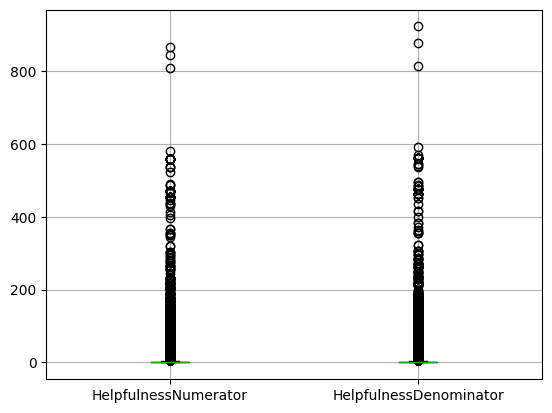

In [ ]:
# box plot to check of outliers
df.boxplot(column=['HelpfulnessNumerator','HelpfulnessDenominator'])

In [ ]:
# checking of outliers
for i in df.columns:
    if df[i].dtype != 'object':
      iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
      upper_bound=df[i].quantile(0.75)+1.5*iqr
      lower_bound=df[i].quantile(0.25)-1.5*iqr
      df=df[(df[i]<upper_bound) & (df[i]>lower_bound)]


<Axes: >

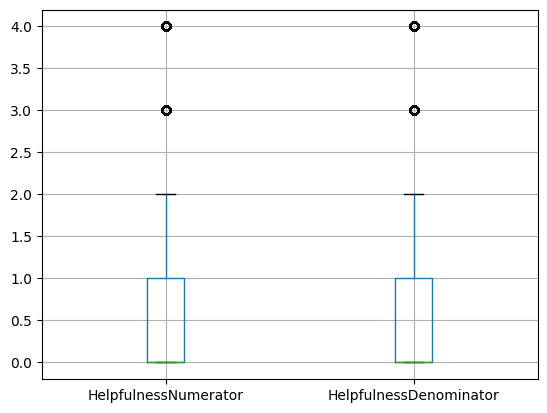

In [ ]:
df.boxplot(column=['HelpfulnessNumerator','HelpfulnessDenominator'])

**Observation**

Removing outliers from this data may weaken the models. The HelpfulnessNumerator and HelpfulnessDenominator values are high, which indicates that the product has been purchased or viewed frequently.

In [ ]:
df = df_backup

In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,year,month,day
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,4,27
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012,9,7
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,2008,8,18
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011,6,13
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,2012,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...,2011,3,9
568450,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...,2012,3,9
568451,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012,2,21
568452,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012,3,13


In [ ]:
df["ratio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"].replace(0, 1)

# Group by denominator buckets
df["bucket"] = pd.cut(df["HelpfulnessDenominator"], bins=[0,5,10,50,100,1000,10000])

# Compute suspicious flags more carefully
df["suspicious"] = (
    ((df["ratio"] == 1) & (df["HelpfulnessDenominator"] <= 3)) |   # small but perfect
    ((df["ratio"] == 0) & (df["HelpfulnessDenominator"] > 10))     # large but useless
)

In [ ]:
df["suspicious"].value_counts()

,count
suspicious,
False,420056
True,148345


In [ ]:
df["ReviewDate"] = pd.to_datetime(dict(year=df["year"], month=df["month"], day=df["day"]))

In [ ]:
## user commenting a lot in one day
count_users_sus = df.groupby(['UserId' ,"ReviewDate"]).size().reset_index(name='review_count')
count_users_sus_number = count_users_sus[count_users_sus['review_count'] > 10]
count_users_sus_number.value_counts()

,,,count
UserId,ReviewDate,review_count,
A100WO06OQR8BQ,2012-03-20,11,1
A3KW8U52DHBD0E,2010-10-29,14,1
A3KM3402ULMILC,2011-10-06,14,1
A3KMILYR935CHF,2012-09-29,11,1
A3KOLWDOS10EVD,2010-04-26,11,1
...,...,...,...
A2ARL5R5P6EL7D,2011-01-16,12,1
A2AS281JRDBLTQ,2012-08-03,15,1
A2ASEKR0NI5EK5,2011-09-17,14,1


In [ ]:
df["time_suspicious"] = (
    df.groupby(["UserId", "ReviewDate"]).transform("size") > 10
)

In [ ]:
df["suspicious_type"] = "none"

df.loc[df["suspicious"] & ~df["time_suspicious"], "suspicious_type"] = "helpfulness"
df.loc[~df["suspicious"] & df["time_suspicious"], "suspicious_type"] = "time"
df.loc[df["suspicious"] & df["time_suspicious"], "suspicious_type"] = "both"

In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,...,Text,year,month,day,ratio,bucket,suspicious,ReviewDate,time_suspicious,suspicious_type
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,...,I have bought several of the Vitality canned d...,2011,4,27,1.0,"(0.0, 5.0]",True,2011-04-27,False,helpfulness
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,...,Product arrived labeled as Jumbo Salted Peanut...,2012,9,7,0.0,NaN,False,2012-09-07,False,none
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,...,This is a confection that has been around a fe...,2008,8,18,1.0,"(0.0, 5.0]",True,2008-08-18,False,helpfulness
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,...,If you are looking for the secret ingredient i...,2011,6,13,1.0,"(0.0, 5.0]",True,2011-06-13,False,helpfulness
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,...,Great taffy at a great price. There was a wid...,2012,10,21,0.0,NaN,False,2012-10-21,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,...,Great for sesame chicken..this is a good if no...,2011,3,9,0.0,NaN,False,2011-03-09,False,none
568450,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,...,I'm disappointed with the flavor. The chocolat...,2012,3,9,0.0,NaN,False,2012-03-09,False,none
568451,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,...,"These stars are small, so you can give 10-15 o...",2012,2,21,1.0,"(0.0, 5.0]",True,2012-02-21,False,helpfulness
568452,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,...,These are the BEST treats for training and rew...,2012,3,13,1.0,"(0.0, 5.0]",True,2012-03-13,False,helpfulness


#**Exploratory Data Analysis (EDA)**

**User activity distribution (ratings per user)**

Text(0.5, 1.0, 'User Activity Distribution (Ratings per User)')

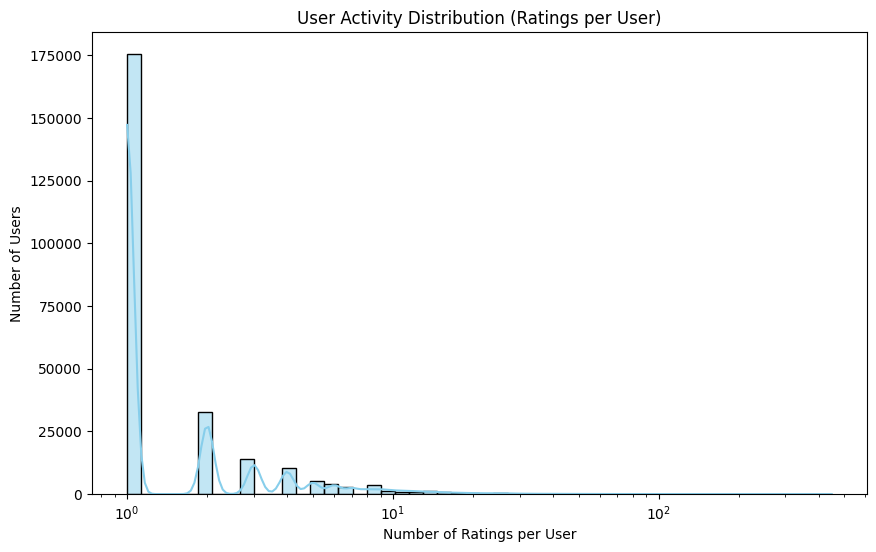

In [ ]:
user_activity = df.groupby('UserId')['Score'].count()
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=50, kde=True, color='skyblue',log_scale=True) # using log_scale for skew
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.title('User Activity Distribution (Ratings per User)')

**Product popularity distribution (ratings per product)**

Text(0.5, 1.0, 'Product Popularity Distribution (Ratings per Product)')

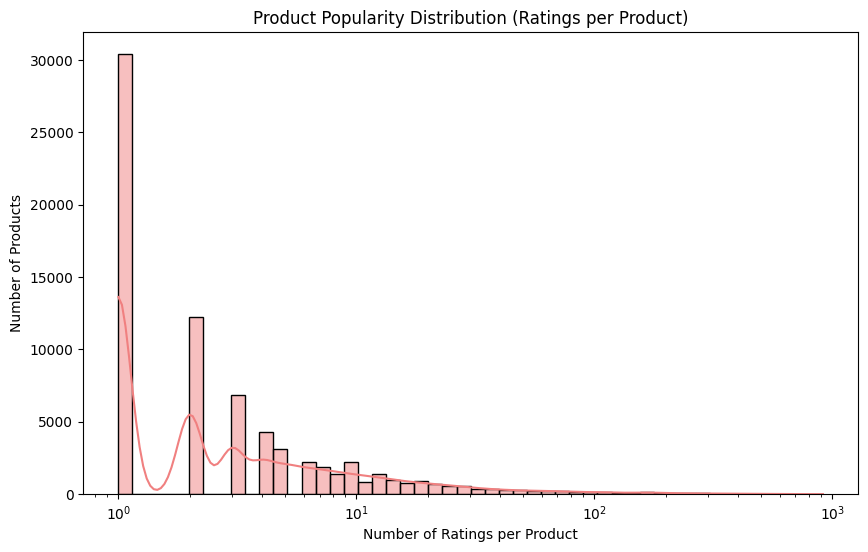

In [ ]:
product_popularity  = df.groupby('ProductId')['Score'].count()
plt.figure(figsize=(10, 6))
sns.histplot(product_popularity, bins=50, kde=True, color='lightcoral',log_scale=True) # using log_scale for skew
plt.xlabel('Number of Ratings per Product')
plt.ylabel('Number of Products')
plt.title('Product Popularity Distribution (Ratings per Product)')

**Rating distribution (1-5 star breakdown)**

/tmp/ipython-input-4196265560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


Text(0.5, 1.0, 'Rating Distribution (1-5 Star Breakdown)')

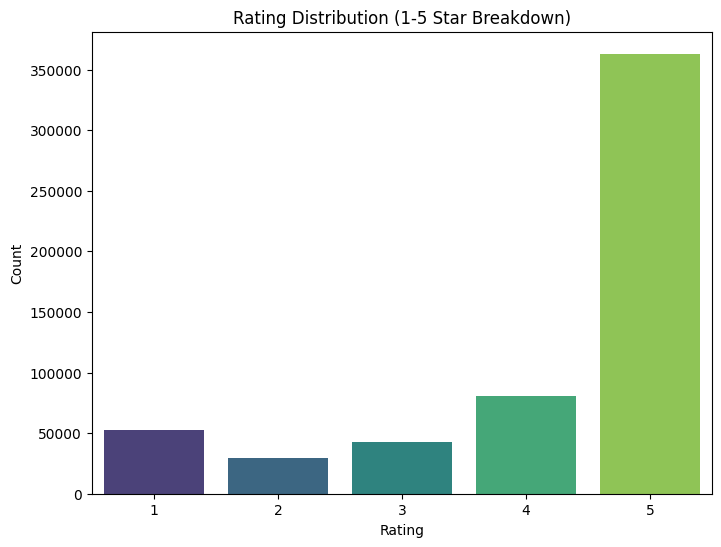

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Score', palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution (1-5 Star Breakdown)')

**Category distribution analysis**

/tmp/ipython-input-1660155380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='main_category', palette='Set2')


Text(0.5, 1.0, 'Category Distribution Analysis')

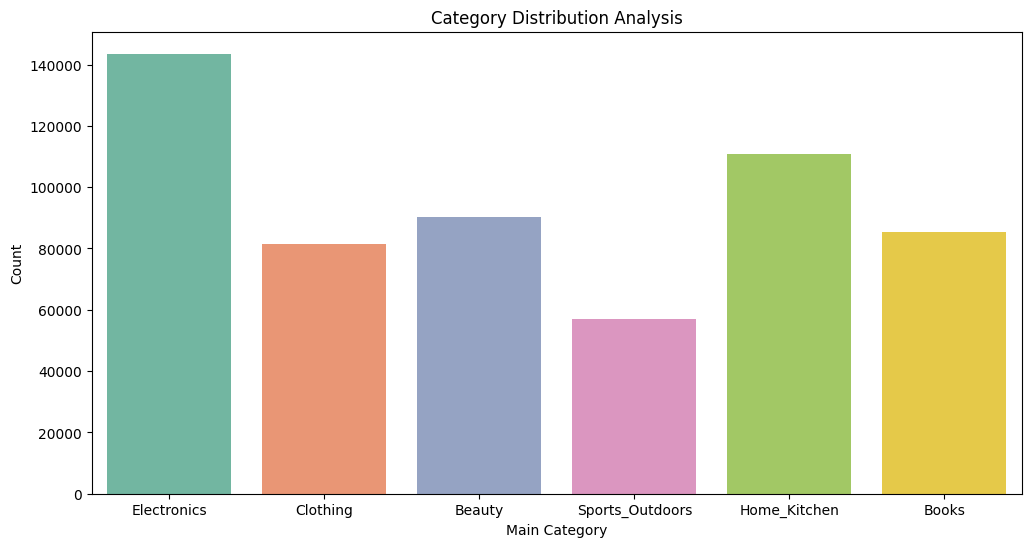

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='main_category', palette='Set2')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Category Distribution Analysis')

/tmp/ipython-input-3845387754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subcategory', palette='Paired')


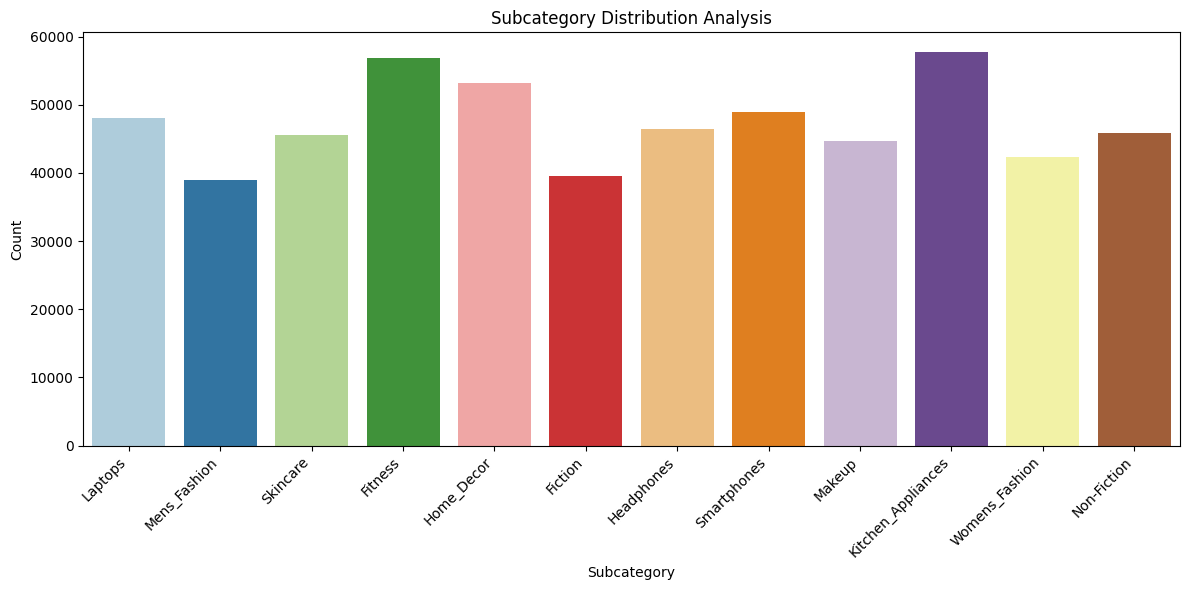

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subcategory', palette='Paired')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.title('Subcategory Distribution Analysis')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,...,Text,year,month,day,ratio,bucket,suspicious,ReviewDate,time_suspicious,suspicious_type
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,...,I have bought several of the Vitality canned d...,2011,4,27,1.0,"(0.0, 5.0]",True,2011-04-27,False,helpfulness
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,...,Product arrived labeled as Jumbo Salted Peanut...,2012,9,7,0.0,NaN,False,2012-09-07,False,none
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,...,This is a confection that has been around a fe...,2008,8,18,1.0,"(0.0, 5.0]",True,2008-08-18,False,helpfulness
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,...,If you are looking for the secret ingredient i...,2011,6,13,1.0,"(0.0, 5.0]",True,2011-06-13,False,helpfulness
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,...,Great taffy at a great price. There was a wid...,2012,10,21,0.0,NaN,False,2012-10-21,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,...,Great for sesame chicken..this is a good if no...,2011,3,9,0.0,NaN,False,2011-03-09,False,none
568450,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,...,I'm disappointed with the flavor. The chocolat...,2012,3,9,0.0,NaN,False,2012-03-09,False,none
568451,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,...,"These stars are small, so you can give 10-15 o...",2012,2,21,1.0,"(0.0, 5.0]",True,2012-02-21,False,helpfulness
568452,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,...,These are the BEST treats for training and rew...,2012,3,13,1.0,"(0.0, 5.0]",True,2012-03-13,False,helpfulness


#**Sparsity Analysis**

**Calculate user-item matrix sparsity**

In [ ]:
n_users = df["UserId"].nunique()
n_items = df["ProductId"].nunique()
n_interactions = len(df)
sparsity = 1 - (n_interactions / (n_users * n_items))
print(f"User-Item Matrix Sparsity: {sparsity:.4f}")

User-Item Matrix Sparsity: 1.0000


**Category-wise sparsity**

In [ ]:
if "main_category" in df.columns:
    category_sparsity = df.groupby("main_category")["ProductId"].nunique() / n_items
    print(category_sparsity.sort_values(ascending=False).head(10))

main_category
Electronics        0.249997
Home_Kitchen       0.200008
Clothing           0.150020
Beauty             0.149993
Books              0.149993
Sports_Outdoors    0.099991
Name: ProductId, dtype: float64


**Identify most/least active user segments**

In [ ]:
print("Most Active Users:")
print(df["UserId"].value_counts().head(10))

print("\nLeast Active Users:")
print(df["UserId"].value_counts().tail(10))

Most Active Users:
UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: count, dtype: int64

Least Active Users:
UserId
A3C4FQNA0MHUL0    1
A31ZSRLG55BLRH    1
A2YQH34KFB65BR    1
A14AMMHQ1EA52K    1
A2O8OFVSTO9PF3    1
A1C6KXG47GAQ7B    1
A1TU5DS89D9OVD    1
A3N005JS5FG5FI    1
AQ8W157G7F6I2     1
A3LGQPJCZVL9UC    1
Name: count, dtype: int64


**Assess cold start challenges**

### Sparsity Analysis Results
- Cold-start Users (<5 ratings): 90.79%
- Cold-start Items (<5 ratings): 72.51%

**Interpretation:**
The dataset is highly sparse.
- Most users have provided very few reviews, making it difficult to learn personalized preferences.
- Most items have very few ratings, which challenges reliability in recommendations.

**Implication:**
- Collaborative Filtering alone will be weak.
- Need to integrate Content-based methods (e.g., categories) and Popularity-based fallback.


Cold-start Users (<5 ratings): 90.79%
Cold-start Products (<5 ratings): 72.51%


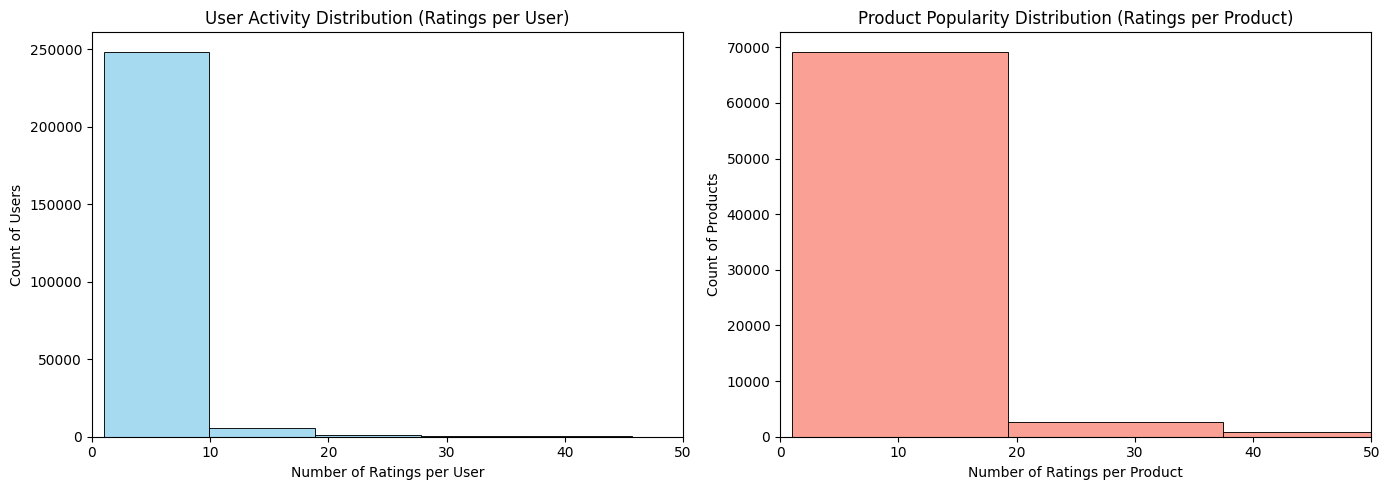

In [ ]:
user_activity = df.groupby("UserId")["Score"].count()

# --- Product popularity (derived as number of ratings per product) ---
product_popularity = df.groupby("ProductId")["Score"].count()

# --- Cold-start thresholds ---
user_cold_start = (user_activity < 5).mean() * 100
product_cold_start = (product_popularity < 5).mean() * 100

print(f"Cold-start Users (<5 ratings): {user_cold_start:.2f}%")
print(f"Cold-start Products (<5 ratings): {product_cold_start:.2f}%")

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of user activity
sns.histplot(user_activity, bins=50, ax=axes[0], color="skyblue")
axes[0].set_title("User Activity Distribution (Ratings per User)")
axes[0].set_xlabel("Number of Ratings per User")
axes[0].set_ylabel("Count of Users")
axes[0].set_xlim(0, 50)

# Distribution of product popularity
sns.histplot(product_popularity, bins=50, ax=axes[1], color="salmon")
axes[1].set_title("Product Popularity Distribution (Ratings per Product)")
axes[1].set_xlabel("Number of Ratings per Product")
axes[1].set_ylabel("Count of Products")
axes[1].set_xlim(0, 50)

plt.tight_layout()
plt.show()

#**Category & Product Analysis**

**category popularity & rating patterns**

                  count      mean
main_category                    
Electronics      143588  4.172305
Home_Kitchen     110862  4.177446
Beauty            90193  4.198452
Books             85437  4.190070
Clothing          81421  4.182410
Sports_Outdoors   56900  4.189508


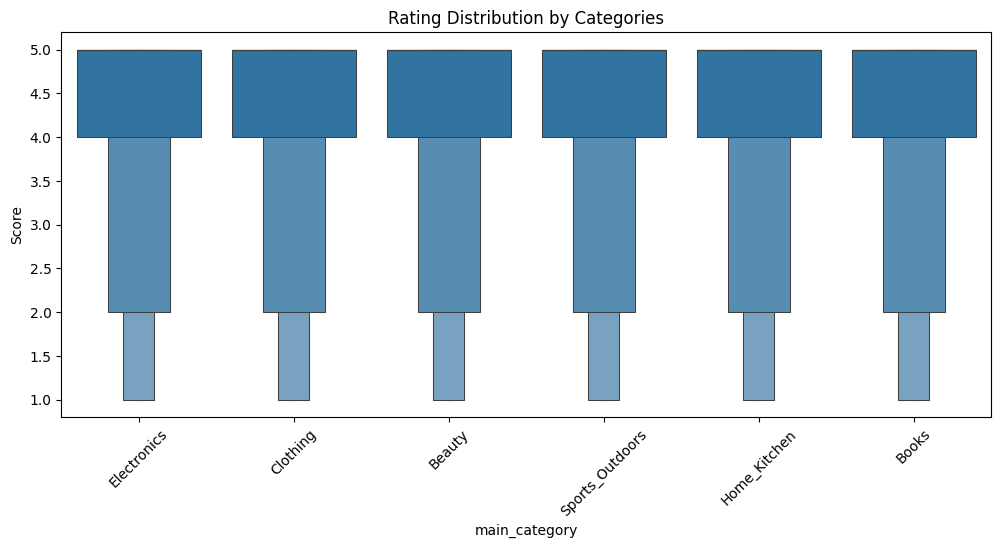

In [ ]:
cat_stats = df.groupby("main_category")["Score"].agg(["count", "mean"]).sort_values("count", ascending=False)
print(cat_stats)

plt.figure(figsize=(12,5))
sns.boxenplot(x="main_category", y="Score", data=df[df["main_category"].isin(cat_stats.index)])
plt.title("Rating Distribution by Categories")
plt.xticks(rotation=45)
plt.show()

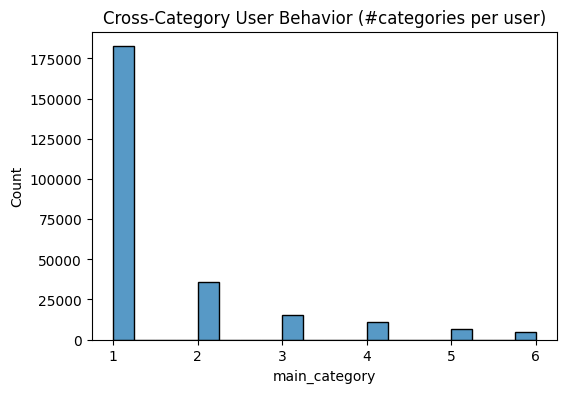

In [ ]:
cross_cat = df.groupby("UserId")["main_category"].nunique()
plt.figure(figsize=(6,4))
sns.histplot(cross_cat, bins=20)
plt.title("Cross-Category User Behavior (#categories per user)")
plt.show()

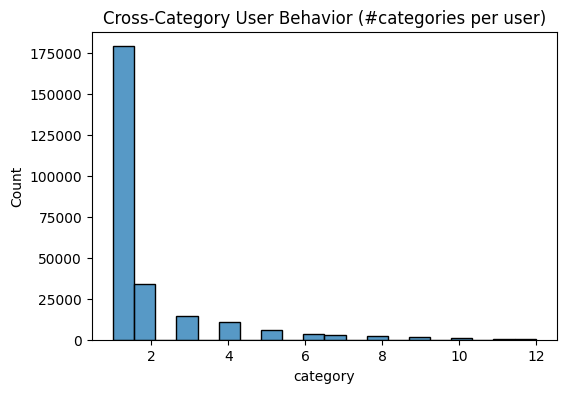

In [ ]:
cross_cat = df.groupby("UserId")["category"].nunique()
plt.figure(figsize=(6,4))
sns.histplot(cross_cat, bins=20)
plt.title("Cross-Category User Behavior (#categories per user)")
plt.show()

📌 Observations

Early-year dip → Reviews start relatively high in January, but drop in February and April.

Mid-year growth → From June onwards, there’s a steady increase in reviews, peaking around September–October.

October peak → November crash → There’s a sudden sharp drop in November (to the lowest of the year), then a slight recovery in December.

Seasonality effect → The peak months (Sept–Oct) may correspond to shopping seasons / product launches, while the sharp November drop could mean missing data, filtering effects, or an actual seasona.

Shopping behavior: People buy and review more in late summer/early fall, maybe before holidays.

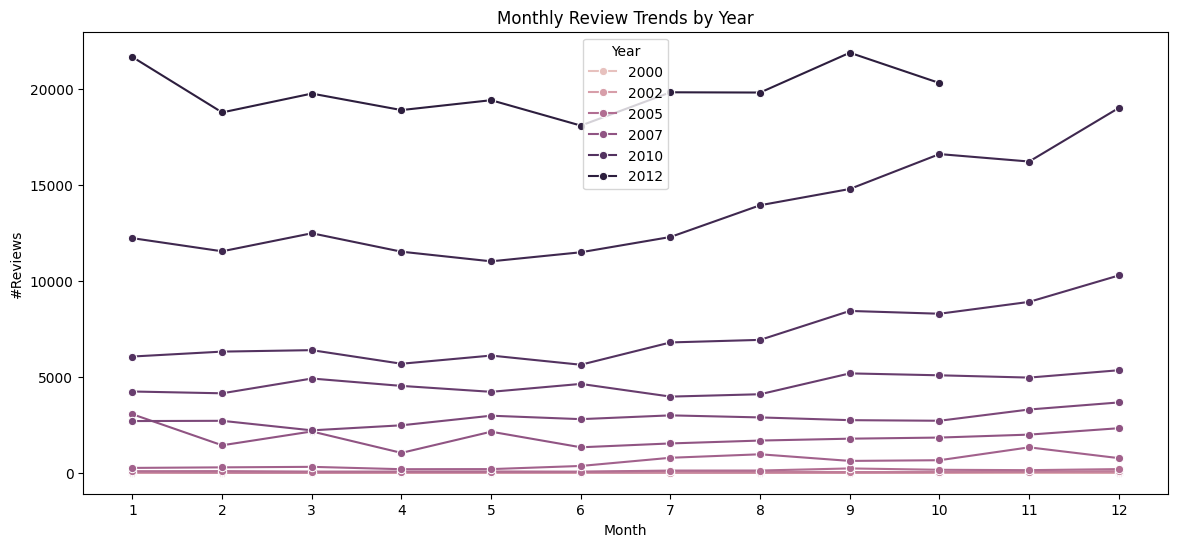

In [ ]:
monthly_trends = df.groupby(["year", "month"]).size().reset_index(name="ReviewCount")

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trends, x="month", y="ReviewCount", hue="year", marker="o")
plt.title("Monthly Review Trends by Year")
plt.xlabel("Month")
plt.ylabel("#Reviews")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.show()


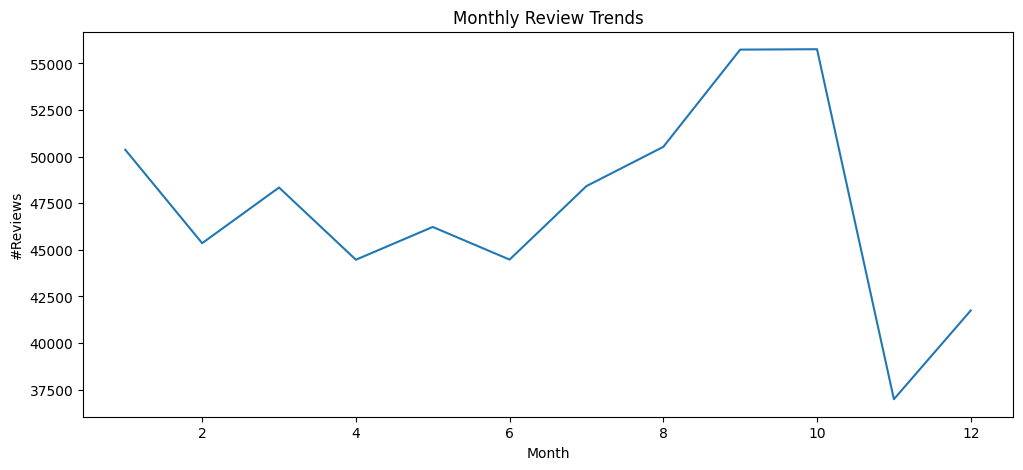

In [ ]:
monthly_counts = df.groupby("month")["Score"].count()
plt.figure(figsize=(12,5))
monthly_counts.plot()
plt.title("Monthly Review Trends")
plt.xlabel("Month")
plt.ylabel("#Reviews")
plt.show()

#**Trust & Quality Analysis**

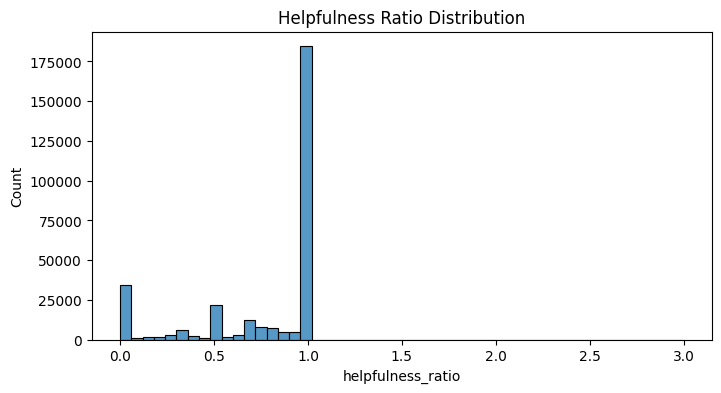

In [ ]:
df["helpfulness_ratio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"].replace(0, np.nan)
plt.figure(figsize=(8,4))
sns.histplot(df["helpfulness_ratio"].dropna(), bins=50)
plt.title("Helpfulness Ratio Distribution")
plt.show()

In [ ]:
print(df[["helpfulness_ratio", "Score"]].corr())

                   helpfulness_ratio     Score
helpfulness_ratio           1.000000  0.377013
Score                       0.377013  1.000000


In [ ]:
reviewer_quality = df.groupby("UserId").agg(
    avg_help=("helpfulness_ratio", "mean"),
    num_reviews=("Score", "count")
)
high_quality = reviewer_quality[(reviewer_quality["avg_help"] > 0.8) & (reviewer_quality["num_reviews"] > 50)]
print("High-Quality Reviewers:\n", high_quality.head(10))

High-Quality Reviewers:
                 avg_help  num_reviews
UserId                               
A106ZCP7RSXMRU  0.845754           60
A1080SE9X3ECK0  0.905336           72
A10G136JEISLVR  1.000000           51
A11ED8O95W2103  0.807183           57
A13HRSMJ5TOWEZ  1.000000           72
A13K3ZLWAWN1EI  0.909522           52
A13WOT3RSXKRD5  1.000000           51
A17HMM1M7T9PJ1  0.948630          113
A17V9XL4CWTQ6G  0.892836           76
A19SDJ2TSSL8HI  0.909297           59


In [ ]:
reviewer_quality["trust_score"] = (reviewer_quality["avg_help"] * reviewer_quality["num_reviews"]) / reviewer_quality["num_reviews"].max()
print(reviewer_quality.sort_values("trust_score", ascending=False).head(10))

                avg_help  num_reviews  trust_score
UserId                                            
A3OXHLG6DIBRW8  0.979675          448     0.979675
A1YUL9PCJR3JTY  0.946198          421     0.889173
AY12DBB0U420B   0.942613          389     0.818474
A281NPSIMI1C2R  0.853728          365     0.695560
A1Z54EM24Y40LL  0.899383          256     0.513933
AQQLWCMRNDFGI   0.934008          176     0.366932
A2MUGFV2TDQ47K  0.792779          201     0.355689
A3PJZ8TU8FDQ1K  0.870002          178     0.345671
A29JUMRL1US6YP  0.894217          172     0.343316
A1UQBFCERIP7VJ  0.970580          157     0.340136


## Feature Engineering & selection

**User Features**



In [ ]:
user_avg_rating = df.groupby("UserId")["Score"].mean().reset_index(name="user_avg_rating")
user_avg_rating

,UserId,user_avg_rating
0,#oc-R103C0QSV1DF5E,5.000000
1,#oc-R109MU5OBBZ59U,5.000000
2,#oc-R10LFEMQEW6QGZ,5.000000
3,#oc-R10LT57ZGIB140,3.000000
4,#oc-R10UA029WVWIUI,1.000000
...,...,...
256037,AZZV9PDNMCOZW,4.666667
256038,AZZVNIMTTMJH6,5.000000
256039,AZZY649VYAHQS,5.000000
256040,AZZYCJOJLUDYR,5.000000


**Rating variance (consistency)**

In [ ]:
# Filtering the users who reviewed more than or equal 5 for variance
active_users = df.groupby("UserId").filter(lambda x: len(x) >= 5)
user_var_rating = active_users.groupby("UserId")["Score"].var().reset_index(name="user_rating_variance")
user_var_rating

,UserId,user_rating_variance
0,A1001WMV1CL0XH,0.000000
1,A10023OS6MZUC6,1.800000
2,A1004703RC79J9,0.904762
3,A100IC7JRCQDUD,0.571429
4,A100UZGZNZ9ZYN,1.125000
...,...,...
23586,AZYS62CA5X6YZ,0.000000
23587,AZYW6LUFW2RFN,0.000000
23588,AZYXC63SS008M,0.000000
23589,AZZA4Q0JACD5U,0.300000


**Category preferences (% of ratings per category)**

In [ ]:
user_category_pref = df.groupby(["UserId", "category"])["Score"].count().reset_index()
user_category_pref["category_pref_pct"] = user_category_pref.groupby("UserId")["Score"].transform(lambda x: x/x.sum())
user_category_pref

,UserId,category,Score,category_pref_pct
0,#oc-R103C0QSV1DF5E,Sports_Outdoors > Fitness,1,1.000000
1,#oc-R109MU5OBBZ59U,Beauty > Makeup,1,1.000000
2,#oc-R10LFEMQEW6QGZ,Beauty > Makeup,1,1.000000
3,#oc-R10LT57ZGIB140,Sports_Outdoors > Fitness,1,1.000000
4,#oc-R10UA029WVWIUI,Sports_Outdoors > Fitness,1,1.000000
...,...,...,...,...
457775,AZZV9PDNMCOZW,Electronics > Laptops,1,0.333333
457776,AZZVNIMTTMJH6,Books > Fiction,1,1.000000
457777,AZZY649VYAHQS,Clothing > Womens_Fashion,1,1.000000
457778,AZZYCJOJLUDYR,Electronics > Headphones,1,1.000000


**Activity level (total ratings, time span)**

In [ ]:
user_activity = df.groupby("UserId")["Score"].count().reset_index(name="total_ratings")
user_timespan = df.groupby("UserId")["ReviewDate"].agg(["min","max"])
user_timespan["active_days"] = (user_timespan["max"] - user_timespan["min"]).dt.days
user_timespan

,min,max,active_days
UserId,,,
#oc-R103C0QSV1DF5E,2012-07-24,2012-07-24,0
#oc-R109MU5OBBZ59U,2012-10-13,2012-10-13,0
#oc-R10LFEMQEW6QGZ,2012-08-26,2012-08-26,0
#oc-R10LT57ZGIB140,2011-07-14,2011-07-14,0
#oc-R10UA029WVWIUI,2012-07-17,2012-07-17,0
...,...,...,...
AZZV9PDNMCOZW,2011-07-12,2012-02-17,220
AZZVNIMTTMJH6,2010-03-10,2010-03-10,0
AZZY649VYAHQS,2011-07-04,2011-07-04,0


**Trust score (avg helpfulness ratio)**

In [ ]:
active_users = df.groupby("UserId").filter(lambda x: len(x) >= 5)
user_trust = active_users.groupby("UserId")["helpfulness_ratio"].mean().fillna(0).reset_index(name="user_trust_score")
user_trust

,UserId,user_trust_score
0,A1001WMV1CL0XH,1.000000
1,A10023OS6MZUC6,0.571429
2,A1004703RC79J9,0.909091
3,A100IC7JRCQDUD,1.000000
4,A100UZGZNZ9ZYN,0.418750
...,...,...
23586,AZYS62CA5X6YZ,1.000000
23587,AZYW6LUFW2RFN,1.000000
23588,AZYXC63SS008M,1.000000
23589,AZZA4Q0JACD5U,1.000000


##**Product Features**

**Average rating per product**


In [ ]:
product_avg_rating = df.groupby("ProductId")["Score"].mean().reset_index(name="product_avg_rating")
product_avg_rating

,ProductId,product_avg_rating
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.751445
...,...,...
74252,B009UOFTUI,1.000000
74253,B009UOFU20,1.000000
74254,B009UUS05I,5.000000
74255,B009WSNWC4,5.000000


**Number of ratings received**

In [ ]:
product_num_ratings = df.groupby("ProductId")["Score"].count().reset_index(name="num_ratings")
product_num_ratings

,ProductId,num_ratings
0,0006641040,37
1,141278509X,1
2,2734888454,2
3,2841233731,1
4,7310172001,173
...,...,...
74252,B009UOFTUI,1
74253,B009UOFU20,1
74254,B009UUS05I,1
74255,B009WSNWC4,1


**Category & subcategory encoding**

In [ ]:
product_categories = df.groupby("ProductId")["category"].first().reset_index()
product_categories

,ProductId,category
0,0006641040,Books > Non-Fiction
1,141278509X,Home_Kitchen > Kitchen_Appliances
2,2734888454,Electronics > Smartphones
3,2841233731,Home_Kitchen > Kitchen_Appliances
4,7310172001,Electronics > Laptops
...,...,...
74252,B009UOFTUI,Electronics > Smartphones
74253,B009UOFU20,Sports_Outdoors > Fitness
74254,B009UUS05I,Home_Kitchen > Home_Decor
74255,B009WSNWC4,Home_Kitchen > Home_Decor


**Age of product (first review date)**

In [ ]:
product_age = df.groupby("ProductId")["ReviewDate"].min().reset_index(name="first_review_date")
product_age

,ProductId,first_review_date
0,0006641040,1999-10-08
1,141278509X,2012-03-24
2,2734888454,2007-10-11
3,2841233731,2012-08-25
4,7310172001,2005-01-04
...,...,...
74252,B009UOFTUI,2012-08-25
74253,B009UOFU20,2012-08-25
74254,B009UUS05I,2012-03-16
74255,B009WSNWC4,2012-10-26


#**Interaction Features**

**User-category interaction patterns**

In [ ]:
user_category_matrix = pd.crosstab(df["UserId"], df["category"])
user_category_matrix

category,Beauty > Makeup,Beauty > Skincare,Books > Fiction,Books > Non-Fiction,Clothing > Mens_Fashion,Clothing > Womens_Fashion,Electronics > Headphones,Electronics > Laptops,Electronics > Smartphones,Home_Kitchen > Home_Decor,Home_Kitchen > Kitchen_Appliances,Sports_Outdoors > Fitness
UserId,,,,,,,,,,,,
#oc-R103C0QSV1DF5E,0,0,0,0,0,0,0,0,0,0,0,1
#oc-R109MU5OBBZ59U,1,0,0,0,0,0,0,0,0,0,0,0
#oc-R10LFEMQEW6QGZ,1,0,0,0,0,0,0,0,0,0,0,0
#oc-R10LT57ZGIB140,0,0,0,0,0,0,0,0,0,0,0,1
#oc-R10UA029WVWIUI,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
AZZV9PDNMCOZW,0,0,1,1,0,0,0,1,0,0,0,0
AZZVNIMTTMJH6,0,0,1,0,0,0,0,0,0,0,0,0
AZZY649VYAHQS,0,0,0,0,0,1,0,0,0,0,0,0


**Time-based features (recency of rating)**

In [ ]:
df["recency_days"] = (df["ReviewDate"].max() - df["ReviewDate"]).dt.days
df["recency_days"]


,recency_days
0,548
1,49
2,1530
3,501
4,5
...,...
568449,597
568450,231
568451,248
568452,227


**Rating deviation from user/product averages**

In [ ]:
df = df.merge(user_avg_rating, on="UserId")
df = df.merge(product_avg_rating, on="ProductId")
df["user_dev"] = df["Score"] - df["user_avg_rating"]
df["product_dev"] = df["Score"] - df["product_avg_rating"]


**Cross-category purchasing patterns**

In [ ]:
cross_category = df.groupby("UserId")["category"].nunique().reset_index(name="num_categories_rated")
cross_category


,UserId,num_categories_rated
0,#oc-R103C0QSV1DF5E,1
1,#oc-R109MU5OBBZ59U,1
2,#oc-R10LFEMQEW6QGZ,1
3,#oc-R10LT57ZGIB140,1
4,#oc-R10UA029WVWIUI,1
...,...,...
256037,AZZV9PDNMCOZW,3
256038,AZZVNIMTTMJH6,1
256039,AZZY649VYAHQS,1
256040,AZZYCJOJLUDYR,1


In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,...,suspicious,ReviewDate,time_suspicious,suspicious_type,helpfulness_ratio,recency_days,user_avg_rating,product_avg_rating,user_dev,product_dev
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,...,True,2011-04-27,False,helpfulness,1.0,548,5.000000,5.00,0.000000,0.00
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,...,False,2012-09-07,False,none,NaN,49,1.000000,1.00,0.000000,0.00
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,...,True,2008-08-18,False,helpfulness,1.0,1530,4.333333,4.00,-0.333333,0.00
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,...,True,2011-06-13,False,helpfulness,1.0,501,2.000000,2.00,0.000000,0.00
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,...,False,2012-10-21,False,none,NaN,5,5.000000,4.75,0.000000,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568396,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,...,False,2011-03-09,False,none,NaN,597,5.000000,4.50,0.000000,0.50
568397,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,...,False,2012-03-09,False,none,NaN,231,4.000000,2.00,-2.000000,0.00
568398,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,...,True,2012-02-21,False,helpfulness,1.0,248,5.000000,5.00,0.000000,0.00
568399,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,...,True,2012-03-13,False,helpfulness,1.0,227,4.500000,5.00,0.500000,0.00


#**Categorical Encoding**

**One-hot encoding for main categories**

In [ ]:
category_onehot = pd.get_dummies(df["category"], prefix="cat")
category_onehot

,cat_Beauty > Makeup,cat_Beauty > Skincare,cat_Books > Fiction,cat_Books > Non-Fiction,cat_Clothing > Mens_Fashion,cat_Clothing > Womens_Fashion,cat_Electronics > Headphones,cat_Electronics > Laptops,cat_Electronics > Smartphones,cat_Home_Kitchen > Home_Decor,cat_Home_Kitchen > Kitchen_Appliances,cat_Sports_Outdoors > Fitness
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
568396,False,False,False,False,False,False,False,False,False,True,False,False
568397,False,False,False,True,False,False,False,False,False,False,False,False
568398,False,False,False,False,False,False,True,False,False,False,False,False
568399,False,False,False,False,False,False,True,False,False,False,False,False


**Label encoding for high-cardinality features**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["category_encoded"] = le.fit_transform(df["category"])

In [ ]:
df["Brand"] = df["product_name"].str.split().str[0]


In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,...,time_suspicious,suspicious_type,helpfulness_ratio,recency_days,user_avg_rating,product_avg_rating,user_dev,product_dev,category_encoded,Brand
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,...,False,helpfulness,1.0,548,5.000000,5.00,0.000000,0.00,7,Lenovo
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,...,False,none,NaN,49,1.000000,1.00,0.000000,0.00,4,brands
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,...,False,helpfulness,1.0,1530,4.333333,4.00,-0.333333,0.00,1,brands
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,...,False,helpfulness,1.0,501,2.000000,2.00,0.000000,0.00,11,specs
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,...,False,none,NaN,5,5.000000,4.75,0.000000,0.25,9,brands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568396,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,...,False,none,NaN,597,5.000000,4.50,0.000000,0.50,9,brands
568397,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,...,False,none,NaN,231,4.000000,2.00,-2.000000,0.00,3,specs
568398,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,...,False,helpfulness,1.0,248,5.000000,5.00,0.000000,0.00,6,Sony
568399,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,...,False,helpfulness,1.0,227,4.500000,5.00,0.500000,0.00,6,Sony


#**🤖 MODELLING**

In [ ]:
cf_data = df[["UserId", "ProductId", "Score"]]


In [ ]:
featured_df = user_avg_rating.merge(user_var_rating, on="UserId") \
                               .merge(user_activity, on="UserId") \
                               .merge(user_trust, on="UserId")

In [ ]:
# !sudo apt-get update -y
# !sudo apt-get install python3.10 python3.10-dev python3.10-distutils -y
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
# !sudo update-alternatives --config python3

In [ ]:
# !python3 -m pip install --upgrade pip
# !pip install numpy scikit-surprise

In [ ]:
# !pip uninstall -y scikit-surprise numpy
# !pip install numpy==1.26.1
# !pip install scikit-surprise --no-cache-dir

In [ ]:
from surprise import SVD, SVDpp, NMF, KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, cross_validate

# Prepare data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(cf_data[['UserId', 'ProductId', 'Score']], reader)

# Split train/test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Define models to compare
models = {
    "SVD": SVD(),
    "SVD++": SVDpp(),

}

# Dictionary to store results
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(trainset)
    predictions = model.test(testset)

    rmse = accuracy.rmse(predictions, verbose=False)
    mae = accuracy.mae(predictions, verbose=False)

    results[name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{name} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")

# Show summary
import pandas as pd
results_df = pd.DataFrame(results).T
print("Comparison of models:\n")
print(results_df)


Training SVD...
SVD -> RMSE: 1.0799, MAE: 0.7877

Training SVD++...
SVD++ -> RMSE: 1.0579, MAE: 0.7513

Comparison of models:

           RMSE       MAE
SVD    1.079926  0.787706
SVD++  1.057904  0.751295


In [ ]:
user_id = cf_data['UserId'].iloc[0]
product_id = cf_data['ProductId'].iloc[0]

pred = models['SVD'].predict(user_id, product_id)
print(f"Predicted rating for User {user_id} on Product {product_id}: {pred.est:.2f}")

Predicted rating for User A3SGXH7AUHU8GW on Product B001E4KFG0: 4.45


#*Simple Content-Based: Category-Based Recommender*

In [ ]:
# Compute average rating per category
category_avg = df.groupby('category')['Score'].mean().to_dict()

# Function to recommend top-N items for a user based on their favorite categories
def recommend_by_category(user_id, n=5):
    # Get categories user has rated
    user_cats = df[df['UserId']==user_id]['category'].value_counts()

    # Sort categories by user's activity
    top_cats = user_cats.index.tolist()

    # Get top-N items from user's top categories (excluding already rated)
    user_rated = set(df[df['UserId']==user_id]['ProductId'])
    recommendations = []
    for cat in top_cats:
        cat_items = df[df['category']==cat].sort_values('Score', ascending=False)
        for item in cat_items['product_name']:
            if item not in user_rated and item not in recommendations:
                recommendations.append(item)
            if len(recommendations) >= n:
                break
        if len(recommendations) >= n:
            break
    return recommendations[:n]


Category-based recommendations for User 1: ['brands CB2', 'specs Modern', 'specs Modern Deluxe', 'models Standard Vase', 'brands Pro IKEA']


In [ ]:
print("Category-based recommendations for User 1:", recommend_by_category('A1UQRSCLF8GW1T'))
print("Category-based recommendations for User 1:", recommend_by_category('A1D87F6ZCVE5NK'))

Category-based recommendations for User 1: ['brands CB2', 'specs Modern', 'specs Modern Deluxe', 'models Standard Vase', 'brands Pro IKEA']
Category-based recommendations for User 1: ['models Shorts - Pro', 'specs Premium Athletic', 'models Standard Sneakers', 'specs Slim Fit Standard', 'models Jacket Pro']


In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,...,time_suspicious,suspicious_type,helpfulness_ratio,recency_days,user_avg_rating,product_avg_rating,user_dev,product_dev,category_encoded,Brand
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,...,False,helpfulness,1.0,548,5.000000,5.00,0.000000,0.00,7,Lenovo
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,...,False,none,NaN,49,1.000000,1.00,0.000000,0.00,4,brands
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,...,False,helpfulness,1.0,1530,4.333333,4.00,-0.333333,0.00,1,brands
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,...,False,helpfulness,1.0,501,2.000000,2.00,0.000000,0.00,11,specs
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,...,False,none,NaN,5,5.000000,4.75,0.000000,0.25,9,brands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568396,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,...,False,none,NaN,597,5.000000,4.50,0.000000,0.50,9,brands
568397,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,...,False,none,NaN,231,4.000000,2.00,-2.000000,0.00,3,specs
568398,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,...,False,helpfulness,1.0,248,5.000000,5.00,0.000000,0.00,6,Sony
568399,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,...,False,helpfulness,1.0,227,4.500000,5.00,0.500000,0.00,6,Sony


In [ ]:
# def weighted_hybrid(user_id, ProductId, cf_pred, score, alpha=0.7):
#     """
#     cf_pred: predicted rating from SVD
#     content_score: normalized content-based score (0-1)
#     alpha: weight for CF
#     """
#     return alpha * cf_pred + (1 - alpha) * (content_score * 5)  # scale content score to 1-5


Weighted hybrid score: 4.127527709359606


In [ ]:
df.columns

Index(['Id', 'ProductId', 'product_name', 'main_category', 'subcategory',
       'category', 'Id', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Summary', 'Text', 'year', 'month',
       'day', 'ratio', 'bucket', 'suspicious', 'ReviewDate', 'time_suspicious',
       'suspicious_type', 'helpfulness_ratio', 'recency_days',
       'user_avg_rating', 'product_avg_rating', 'user_dev', 'product_dev',
       'category_encoded', 'Brand'],
      dtype='object')

In [ ]:
df

,Id,ProductId,product_name,main_category,subcategory,category,Id,UserId,ProfileName,HelpfulnessNumerator,...,time_suspicious,suspicious_type,helpfulness_ratio,recency_days,user_avg_rating,product_avg_rating,user_dev,product_dev,category_encoded,Brand
0,1,B001E4KFG0,Lenovo Flex 5,Electronics,Laptops,Electronics > Laptops,1,A3SGXH7AUHU8GW,delmartian,1,...,False,helpfulness,1.0,548,5.000000,5.00,0.000000,0.00,7,Lenovo
1,2,B00813GRG4,brands Levi's - Pro,Clothing,Mens_Fashion,Clothing > Mens_Fashion,2,A1D87F6ZCVE5NK,dll pa,0,...,False,none,NaN,49,1.000000,1.00,0.000000,0.00,4,brands
2,3,B000LQOCH0,brands Clinique 50ml,Beauty,Skincare,Beauty > Skincare,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,...,False,helpfulness,1.0,1530,4.333333,4.00,-0.333333,0.00,1,brands
3,4,B000UA0QIQ,specs Ergonomic - Adjustable,Sports_Outdoors,Fitness,Sports_Outdoors > Fitness,4,A395BORC6FGVXV,Karl,3,...,False,helpfulness,1.0,501,2.000000,2.00,0.000000,0.00,11,specs
4,5,B006K2ZZ7K,brands CB2,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,...,False,none,NaN,5,5.000000,4.75,0.000000,0.25,9,brands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568396,568450,B001EO7N10,brands Wayfair - Premium,Home_Kitchen,Home_Decor,Home_Kitchen > Home_Decor,568450,A28KG5XORO54AY,Lettie D. Carter,0,...,False,none,NaN,597,5.000000,4.50,0.000000,0.50,9,brands
568397,568451,B003S1WTCU,specs Comprehensive - Deluxe,Books,Non-Fiction,Books > Non-Fiction,568451,A3I8AFVPEE8KI5,R. Sawyer,0,...,False,none,NaN,231,4.000000,2.00,-2.000000,0.00,3,specs
568398,568452,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,...,False,helpfulness,1.0,248,5.000000,5.00,0.000000,0.00,6,Sony
568399,568453,B004I613EE,Sony Over-Ear WH-1000XM5,Electronics,Headphones,Electronics > Headphones,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,...,False,helpfulness,1.0,227,4.500000,5.00,0.500000,0.00,6,Sony
